# Graph And AI - Group Project

####    Members
1. Sunil Gauda. ID: 10595858
2. Abhijith Pr. ID: 10603285
3. Kenneth Dsilva ID: 10600644


### Data Source
Link : https://www.kaggle.com/datasets/jillanisofttech/imdb-top-250-eng-movies-dataset

#### Business Problem
Movies are a daily source of entertainment for people. As the library increases day by day with new releases, we have 8.7 million records in IMDB rated, and it is hard to find the ways to explore that based on personal preferences, that's where the recommendation systems ease our problems, Netflix uses their custom implementaion of graph based recommendation system, and with platforms like Neo4J we have easy and straight forward implementaion of the system.
By setting up just 3 simple modules we can load data and have recommendations
1. Data Aquisition - Scrapers, API's, CSV's
2. Data Processing, Loading and Querying - Python Pipeline
3. Data Storage - Neo4j Graph DB

#### Basic Imports

In [1]:
import pandas as pd
from py2neo import Graph
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import time

### Data Acquisition

#### We are acquiring data from the link below as a CSV
Link : https://www.kaggle.com/datasets/jillanisofttech/imdb-top-250-eng-movies-dataset

In [2]:
googleDrive = False
if googleDrive:
    # Google Drive link
    from google.colab import drive
    drive.mount('/content/drive')
    df = pd.read_csv("/content/drive/MyDrive/IMDB_Top250Engmovies2_OMDB_Detailed.csv")
else:
    # Manual Link
    df = pd.read_csv('./DataSet/IMDB_Top250Engmovies2_OMDB_Detailed.csv')
df.head()
len(df.columns)



38

#### Data Processing, Loading and Querying

##### After we have fetched our data we need to clean in first

Required Columns are:

* Title - Movie is known for the title.
* Year - year it is relased can define preference of customer.
* Genre - theme of the movie can narrow down customer preferances, like "Action Movies of 90's".
* Director - people have favourate directors whos movie they watch regularly.
* Writer - writers are the source of story's and one of the major source talent in a movie, without a story there is no movie.
* Actors - people have prefferd actors whose move they like to watch regularly.
* imdbRating - Rating would define how good the movie is.

The Columns that are significant to our use case are kept, further we will Rename and remove other columns as required

In [3]:
cols_to_drop = [3,4,5,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]
df.drop(df.columns[cols_to_drop],axis=1, inplace = True)
df.head()


,Unnamed: 0,Title,Year,Genre,Director,Writer,Actors,imdbRating
0,1,The Shawshank Redemption,1994,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",9.3
1,2,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",9.2
2,3,The Godfather: Part II,1974,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",9.0
3,4,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0
4,5,12 Angry Men,1957,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",8.9


In [4]:
df.columns.to_list()

['Unnamed: 0',
 'Title',
 'Year',
 'Genre',
 'Director',
 'Writer',
 'Actors',
 'imdbRating']

In [5]:
df.rename(columns={'Unnamed: 0':'Index','imdbRating':'Rating'},inplace = True)
df.head()

,Index,Title,Year,Genre,Director,Writer,Actors,Rating
0,1,The Shawshank Redemption,1994,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",9.3
1,2,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",9.2
2,3,The Godfather: Part II,1974,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",9.0
3,4,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0
4,5,12 Angry Men,1957,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",8.9


## Connection details as per Systems used
Note:
* Please trun the `isSandbox` flag to `True` before using Neo4j Sandbox
* Edit the Credentials for your neo4j Credentials as sandbox stays live for only couple of days

In [6]:
#Please add your connection details here.
isSandbox = False
if isSandbox:
    ip="3.92.182.226"
    port="7474"
    pwd="particles-arcs-automobile"
    graph = Graph("bolt://3.92.182.226:7687", auth=("neo4j", pwd))
else:
    pwd="root"
    graph = Graph("bolt://localhost:7687", auth=("neo4j", pwd ))


#### Loding Data
The method below has a flag called `LOAD_DATA` which prevents us from writing the preexisting data and increase load on our database with unneccessary load or errors for pre-existing Nodes
Note:
 * Please set the `LOAD_DATA` to `True` for Loading the data for first time

In [7]:
LOAD_DATA = False

def run_request(request,LOAD_DATA):
    if (LOAD_DATA):
        start_time = time.time()
        print(graph.run(request)) 
        exec_time = time.time() - start_time
        print(f'-- {exec_time} seconds --')

## Deleting Old Data
The method below has a flag called `request_delete` which prevents us from accidently deleting the nodes
Note:
 * Please set the `request_delete` to `True` for Deleting
 * Keep the `request_delete` to `False` for the rest of the time

In [8]:
request_delete ="""
MATCH (n) DETACH DELETE n;
"""
run_request(request_delete,LOAD_DATA)

#### Creating Movies Nodes
The First step in creating a Neo4J Graph is to add the data to the DB, as we already have the data ready as a Data Frame, we can just create each node.

In [9]:
# Creating a reqest String 
request ="""
CREATE (m:Movie {id:$index,name: $Movie_Name})
SET 
m.directors = $director,
m.Year = $year, 
m.rating = $rating,
m.cast=$cast,
m.writers = $writer,
m.genre = $genre
"""
start_time = time.time()
count=df.shape[0]
if (LOAD_DATA):
  for index, row in df.iterrows():
    graph.run(request,
              index=row['Index'],
              Movie_Name=row['Title'],
              director=None if pd.isnull(row['Director']) else row['Director'],
              year= None if pd.isnull(row['Year']) else row['Year'],
              rating=None if pd.isnull(row['Rating']) else row['Rating'],          
              cast= None if pd.isnull(row['Actors']) else row['Actors'],
              writer=None if pd.isnull(row['Writer']) else row['Writer'],
              genre = None if pd.isnull(row['Genre']) else row['Genre']
              )
    if (index%50==0):
        exec_time = time.time()- start_time
        print(f'{index}/{df.shape[0]} done ... -- {exec_time} seconds --')
    
  exec_time = time.time()- start_time
  print(f' ... End ... -- {exec_time} seconds --') 

#### Creating relations
Its necessary to create relations, that is the basis on which we will setup our recommender system.

#### Creating Relation between Persons -> Actor

In [10]:
request ="""
MATCH (m:Movie)
WHERE m.cast IS NOT NULL
WITH m
UNWIND split(m.cast, ',') AS actor
MERGE (p:Person {name: trim(actor)})
MERGE (p)-[r:ACTED_IN]->(m);
"""    
run_request(request,LOAD_DATA)

#### Creating Relation between Person -> Director

In [11]:
request =""" 
MATCH (m:Movie)
WHERE m.directors IS NOT NULL
WITH m
MERGE (d:Person {name: m.directors})
MERGE (d)-[r:DIRECTED]->(m);
"""
run_request(request,LOAD_DATA) 

#### Creating Relation between Movie -> Genre

In [12]:
request ="""    
MATCH (m:Movie)
WHERE m.genre IS NOT NULL
WITH m
UNWIND split(m.genre, ',') AS category
MERGE (c:Genre {name: trim(category)})
MERGE (m)-[r:Genre]->(c);
"""    
run_request(request,LOAD_DATA)

#### Creating Relation between Actor -> Movie <- Actor Relationship

In [13]:
request = """
MATCH (p:Person)-[rel:ACTED_IN]->(m:Movie)<-[:ACTED_IN]-(p2:Person)
MERGE (p)-[r:WORK_WITH]-(p2);
"""
run_request(request,LOAD_DATA) 

#### Creating Relations For Year's

In [14]:
request="""
CREATE INDEX ON :Year(value);
"""
run_request(request,LOAD_DATA)

`1997` Was the year of first rated movie and `2019` is the last year in our dataset for rated movies

In [15]:
request="""
WITH range(1997, 2019) AS years, range(1,12) AS months
FOREACH(year IN years |
  CREATE (y:Year {value: year}));
"""
run_request(request,LOAD_DATA)

In [16]:
request="""
MATCH (year:Year)
WITH year
ORDER BY year.value
WITH collect(year) AS years
FOREACH(i in RANGE(0, size(years)-2) |
    FOREACH(year1 in [years[i]] |
        FOREACH(year2 in [years[i+1]] |
            MERGE (year1)-[:NEXT]->(year2))));
"""
run_request(request,LOAD_DATA)

In [17]:
request="""
MATCH (m:Movie)
WITH m, m.Year AS y
MATCH (year:Year{value:y})
MERGE (m)-[:CREATED_ON]->(year)
RETURN m,year;
"""
run_request(request,LOAD_DATA)

## Useful

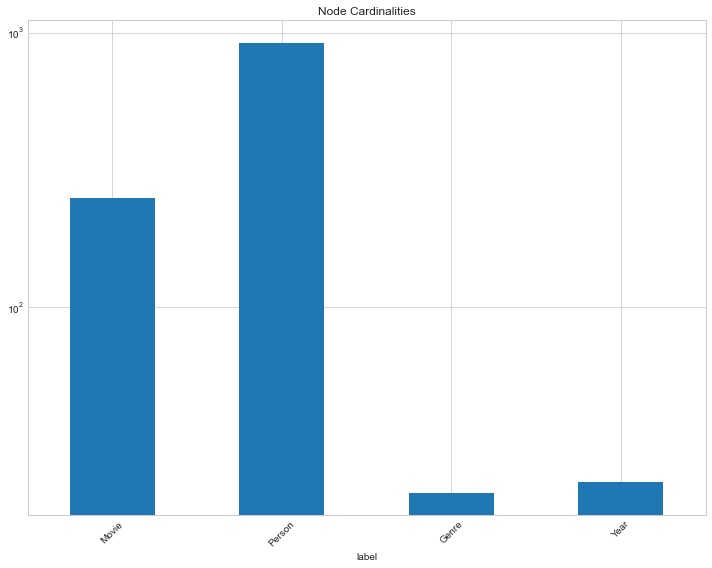

In [18]:
result = {"label": [], "count": []}
for label in graph.run("CALL db.labels()").to_series():
    query = f"MATCH (:`{label}`) RETURN count(*) as count"
    count = graph.run(query).to_data_frame().iloc[0]['count']
    result["label"].append(label)
    result["count"].append(count)
nodes_df = pd.DataFrame(data=result)
nodes_df.sort_values("count")

nodes_df.plot(kind='bar', x='label', y='count', legend=None, title="Node Cardinalities",figsize=(10,8))
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

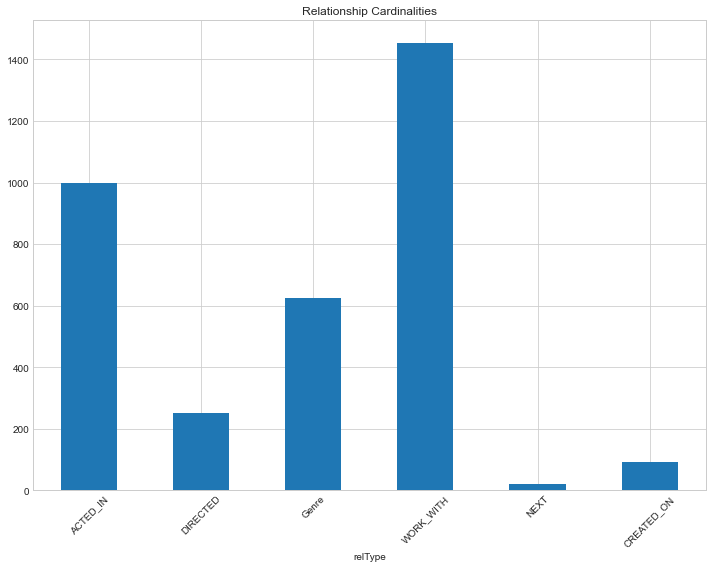

In [19]:
# Relations Ship Cardinalities
result = {"relType": [], "count": []}
for relationship_type in graph.run("CALL db.relationshipTypes()").to_series():
    query = f"MATCH ()-[:`{relationship_type}`]->() RETURN count(*) as count"
    count = graph.run(query).to_data_frame().iloc[0]['count']
    result["relType"].append(relationship_type)
    result["count"].append(count)
rels_df = pd.DataFrame(data=result)
rels_df.sort_values("count")

rels_df.plot(kind='bar', x='relType', y='count', legend=None, title="Relationship Cardinalities",figsize=(10,8))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

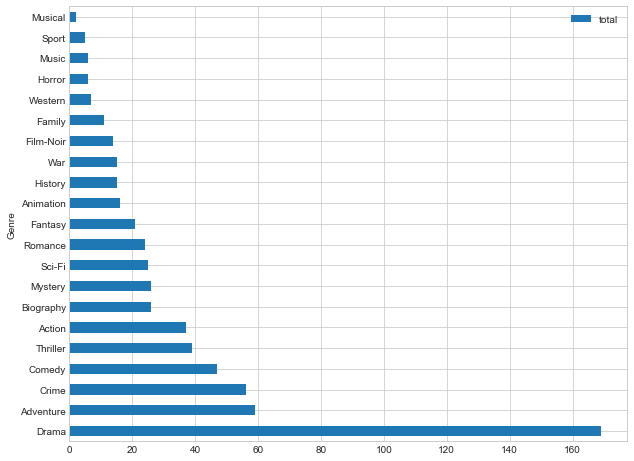

In [20]:
request="""
MATCH (c:Genre)<-[rel:Genre]-(m:Movie)
WITH c.name as Genre,count(*) as total
RETURN  Genre,total
ORDER BY total DESC
"""
result = graph.run(request).to_data_frame()
result.plot.barh(x='Genre', y='total',figsize=(10,8))
plt.show()

In [21]:
request_top_5_actor="""
MATCH (p:Person)-[rel:ACTED_IN]->(m:Movie)
WITH p,collect(m.name) as movies,count(*) as total
RETURN  p.name as Actor, movies As Movies_Acted_In,total As Total_Movies
ORDER BY total DESC
LIMIT 5
"""
graph.run(request_top_5_actor).to_data_frame().head()

,Actor,Movies_Acted_In,Total_Movies
0,Leonardo DiCaprio,"[Inception, The Departed, Django Unchained, Th...",8
1,James Stewart,"[It's a Wonderful Life, Rear Window, Vertigo, ...",7
2,Robert De Niro,"[The Godfather: Part II, Goodfellas, Once Upon...",7
3,Harrison Ford,[Star Wars: Episode V - The Empire Strikes Bac...,7
4,Tom Hanks,"[Forrest Gump, Saving Private Ryan, The Green ...",6


In [22]:
def who_be_present(I_AM,I_WANT_TO_MEET):
    print(f"I'm {I_AM}")
    print(f"I want to meet {I_WANT_TO_MEET}")
    request="""
    MATCH (cs:Person { name: $pfrom }),(ms:Person { name: $pto }), p = shortestPath((cs)-[:ACTED_IN|DIRECTED*]-(ms))
    WHERE length(p)> 1 
    RETURN p
    """
    cursor = graph.run(request,pfrom=I_AM,pto=I_WANT_TO_MEET)
    while cursor.forward():
        print(cursor['p'])
    print('\n')
        
        
I_AM='Leonardo DiCaprio'
I_WANT_TO_MEET='Brad Pitt'
who_be_present(I_AM,I_WANT_TO_MEET)

I_AM='Charles Chaplin'
I_WANT_TO_MEET='Virginia Cherrill'
who_be_present(I_AM,I_WANT_TO_MEET)

I'm Leonardo DiCaprio
I want to meet Brad Pitt
(Leonardo DiCaprio)-[:ACTED_IN {}]->(Django Unchained)<-[:ACTED_IN {}]-(Christoph Waltz)-[:ACTED_IN {}]->(Inglourious Basterds)<-[:ACTED_IN {}]-(Brad Pitt)


I'm Charles Chaplin
I want to meet Virginia Cherrill
(Charles Chaplin)-[:DIRECTED {}]->(City Lights)<-[:ACTED_IN {}]-(Virginia Cherrill)




In [39]:
request_link_prediction_movie="""
MATCH (a:Movie {name:$ptitle} )-[*4]-(b:Movie)
WHERE a <> b AND a.name < b.name
WITH DISTINCT a,b
RETURN a.name as title, b.name as recommendation, gds.alpha.linkprediction.adamicAdar(a, b) AS score
ORDER BY score DESC
LIMIT 10
"""
# The Lord of the Rings: The Fellowship of the Ring
recommend_df = graph.run(request_link_prediction_movie,ptitle="The Lord of the Rings: The Fellowship of the Ring").to_data_frame()
recommend_df

,title,recommendation,score
0,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Return of the King,2.627072
1,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers,2.627072
2,The Lord of the Rings: The Fellowship of the Ring,The Wizard of Oz,0.573705
3,The Lord of the Rings: The Fellowship of the Ring,The Princess Bride,0.573705
4,The Lord of the Rings: The Fellowship of the Ring,The Message,0.440182
5,The Lord of the Rings: The Fellowship of the Ring,The Revenant,0.440182
6,The Lord of the Rings: The Fellowship of the Ring,The Martian,0.440182
7,The Lord of the Rings: The Fellowship of the Ring,The Treasure of the Sierra Madre,0.440182
8,The Lord of the Rings: The Fellowship of the Ring,The Nightmare Before Christmas,0.328459
9,The Lord of the Rings: The Fellowship of the Ring,Toy Story,0.245246


In [24]:
request_link_prediction_movie="""
MATCH (a:Movie {name:$ptitle} )-[*4]-(b:Movie)
WHERE a <> b AND a.name < b.name
WITH DISTINCT a,b
RETURN a.name as title, b.name as recommendation, gds.alpha.linkprediction.adamicAdar(a, b) AS score
ORDER BY score DESC
LIMIT 10
"""
recommend_df = graph.run(request_link_prediction_movie,ptitle="The Lord of the Rings: The Fellowship of the Ring").to_data_frame()
recommend_df

,title,recommendation,score
0,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Return of the King,2.627072
1,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers,2.627072
2,The Lord of the Rings: The Fellowship of the Ring,The Wizard of Oz,0.573705
3,The Lord of the Rings: The Fellowship of the Ring,The Princess Bride,0.573705
4,The Lord of the Rings: The Fellowship of the Ring,The Message,0.440182
5,The Lord of the Rings: The Fellowship of the Ring,The Revenant,0.440182
6,The Lord of the Rings: The Fellowship of the Ring,The Martian,0.440182
7,The Lord of the Rings: The Fellowship of the Ring,The Treasure of the Sierra Madre,0.440182
8,The Lord of the Rings: The Fellowship of the Ring,The Nightmare Before Christmas,0.328459
9,The Lord of the Rings: The Fellowship of the Ring,Toy Story,0.245246


In [25]:
named_graph="""
CALL gds.graph.create(
  'MovieDirectedGraphy',
  'Person',
  'DIRECTED'
);
"""
print(graph.run(named_graph).to_data_frame())

                                      nodeProjection  \
0  {'Person': {'label': 'Person', 'properties': {}}}   

                              relationshipProjection            graphName  \
0  {'DIRECTED': {'orientation': 'NATURAL', 'aggre...  MovieDirectedGraphy   

   nodeCount  relationshipCount  createMillis  
0        917                  0           611  


In [26]:
named_graph="""
CALL gds.graph.create(
  'MovieActedGraph',
  'Person',
  'ACTED_IN'
);
"""
print(graph.run(named_graph).to_data_frame())

                                      nodeProjection  \
0  {'Person': {'label': 'Person', 'properties': {}}}   

                              relationshipProjection        graphName  \
0  {'ACTED_IN': {'orientation': 'NATURAL', 'aggre...  MovieActedGraph   

   nodeCount  relationshipCount  createMillis  
0        917                  0            39  


In [27]:
named_graphWrk="""
CALL gds.graph.create(
  'MovieWorkGraph',
  'Person',
  'WORK_WITH'
);
"""
print(graph.run(named_graphWrk).to_data_frame())

                                      nodeProjection  \
0  {'Person': {'label': 'Person', 'properties': {}}}   

                              relationshipProjection       graphName  \
0  {'WORK_WITH': {'orientation': 'NATURAL', 'aggr...  MovieWorkGraph   

   nodeCount  relationshipCount  createMillis  
0        917               1454            63  


In [28]:
page_rank="""
CALL gds.pageRank.write('MovieDirectedGraphy', {
  maxIterations: 20,
  dampingFactor: 0.85,
  writeProperty: 'pagerank'
})
YIELD nodePropertiesWritten, ranIterations;
"""
print(graph.run(page_rank).to_data_frame())

   nodePropertiesWritten  ranIterations
0                    917              1


In [29]:
page_rank="""
CALL gds.pageRank.write('MovieActedGraph', {
  maxIterations: 20,
  dampingFactor: 0.85,
  writeProperty: 'pagerank'
})
YIELD nodePropertiesWritten, ranIterations;
"""
print(graph.run(page_rank).to_data_frame())

   nodePropertiesWritten  ranIterations
0                    917              1


In [30]:
closeness_act="""
CALL gds.alpha.closeness.write({
  nodeProjection: 'Person',
  relationshipProjection: 'WORK_WITH',
  writeProperty: 'ActClose'
}) YIELD nodes, writeProperty;
"""
print(graph.run(closeness_act).to_data_frame())

   nodes writeProperty
0    917      ActClose


In [31]:
community_detect="""
CALL gds.labelPropagation.stream('MovieWorkGraph')
YIELD nodeId, communityId AS Community
RETURN gds.util.asNode(nodeId).name AS Name, Community
ORDER BY Community, Name
"""
com_val = graph.run(community_detect).to_data_frame()

In [32]:
community_detect="""
CALL gds.labelPropagation.stream('MovieDirectedGraphy')
YIELD nodeId, communityId AS Community
RETURN gds.util.asNode(nodeId).name AS Name, Community
ORDER BY Community, Name
"""
com_val = graph.run(community_detect).to_data_frame()

In [33]:
len(com_val)

917

In [34]:
created_on_graph="""
CALL gds.graph.create(
  'MovieYear',
  'Year',
  'CREATED_ON'
);
"""
print(graph.run(created_on_graph).to_data_frame())

                                  nodeProjection  \
0  {'Year': {'label': 'Year', 'properties': {}}}   

                              relationshipProjection  graphName  nodeCount  \
0  {'CREATED_ON': {'orientation': 'NATURAL', 'agg...  MovieYear         23   

   relationshipCount  createMillis  
0                  0            21  


In [35]:
year_community_detect="""
CALL gds.labelPropagation.stream('MovieYear')
YIELD nodeId, communityId AS Community
RETURN gds.util.asNode(nodeId).name AS Name, Community
ORDER BY Community, Name
"""
com_val = graph.run(year_community_detect).to_data_frame()

In [36]:
com_val.drop_duplicates

<bound method DataFrame.drop_duplicates of     Name  Community
0   None       1188
1   None       1189
2   None       1190
3   None       1191
4   None       1192
5   None       1193
6   None       1194
7   None       1195
8   None       1196
9   None       1197
10  None       1198
11  None       1199
12  None       1200
13  None       1201
14  None       1202
15  None       1203
16  None       1204
17  None       1205
18  None       1206
19  None       1207
20  None       1208
21  None       1209
22  None       1210>

In [37]:
com_val

,Name,Community
0,None,1188
1,None,1189
2,None,1190
3,None,1191
4,None,1192
5,None,1193
6,None,1194
7,None,1195
8,None,1196
9,None,1197
